## Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from collections import defaultdict
import os
import pickle
from tqdm import tqdm
import torch
import numpy as np
import plotly.express as px

In [7]:
model_path = '/storage/models'
# model_name = 'mistral-GPTQ-4bit'
# model_name = 'Mistral-7B-Instruct-v0.1'
model_name = 'mistral-GPTQ-4bit-v0.1'
device='cuda:0'

In [8]:
model_name_or_path = f'{model_path}/{model_name}'
model = AutoModelForCausalLM.from_pretrained(model_name_or_path, torch_dtype=torch.float16, device_map='auto')
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True, padding_side="left", legacy=False)
tokenizer.pad_token_id = 0

/opt/conda/lib/python3.10/site-packages/transformers/modeling_utils.py:4193: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


In [10]:
user_tag = "[INST]"
assistant_tag = "[/INST]"

## Train honesty extraction

In [53]:
he = HonestyExtractor(model, tokenizer, user_tag, assistant_tag)
direction_info = he.find_honesty_directions()

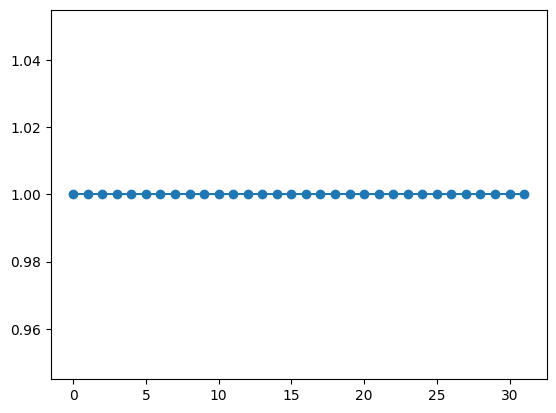

In [54]:
test_act_pairs = get_activations_for_paired_statements(statement_pairs, model, tokenizer, sample_range=[512, 768]) 
accs = get_accs_for_pairs(test_act_pairs, direction_info)

import matplotlib.pyplot as plt
plt.plot(accs, '-o')
plt.show()